In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

import datetime

In [65]:
colors = cm.tab10

In [66]:
dat = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
dat.columns = ['date', 'region', 'state', 'fips', 'cases', 'deaths']
dat = dat.drop('state', axis = 1)
tmp = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
tmp.columns = ['date', 'region', 'fips', 'cases', 'deaths']
dat = dat.append(tmp).reset_index(drop = True)
dat.date = [datetime.datetime.strptime(c, '%Y-%m-%d') for c in dat.date]

In [67]:
dat = dat.groupby(['date', 'region']).sum().reset_index()

In [68]:
#regions = ['New York City', 'San Francisco', 'Oakland', 'San Mateo']
regions = ['New York', 'New York City', 'California', 'San Francisco', 'Wayne']

## States

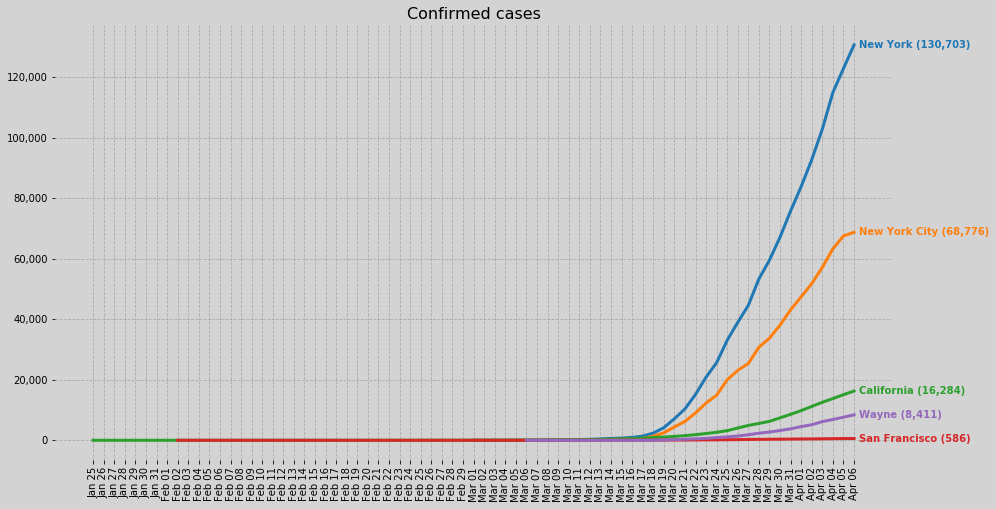

In [69]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0

ticks = []
for n,s in enumerate(regions):
    region = regions[n]
    
    to_plot = dat.loc[dat.region == region]
    
    y = to_plot.cases
    x = to_plot.date
    
    if len(x) > len(ticks):
        ticks = x
    
    tmp = next((i for i, x in enumerate(y) if x), None)
    if tmp > minx:
        minx = tmp
    
    ax.plot(x, y, color = colors(n), linewidth = 3)
    ax.text(list(x)[-1]+datetime.timedelta(0.5), list(y)[-1], '{} ({:,.0f})'.format(region, list(y)[-1]), color = colors(n), va = 'center', ha = 'left', fontweight = 'bold')

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')

ax.set_xticks(ticks)
ax.set_title('Confirmed cases', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')
    
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.xaxis.set_major_formatter(xfmt)

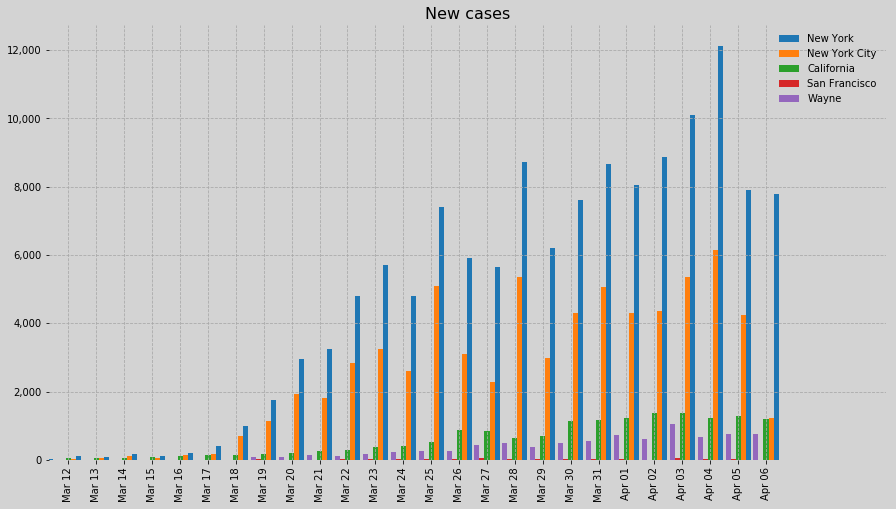

In [70]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0
width = 0.9/len(regions)

for n,dt in enumerate(sorted(list(set(dat.date)))):
    for r,s in enumerate(regions):
        if dt < min(dat.loc[dat.region == region, 'date']):
            y = 0
        elif dt == min(dat.loc[dat.region == region, 'date']):
            idx = [(x == dt) and (y == s) for x,y in zip(dat.date, dat.region)]
            y = dat.loc[idx, 'cases']
        else:
            prev_dt = max(dat.loc[dat.date < dt, 'date'])
            idx0 = [(x == prev_dt) and (y == s) for x,y in zip(dat.date, dat.region)]
            idx1 = [(x == dt) and (y == s) for x,y in zip(dat.date, dat.region)]
            if (sum(idx0) == 0) and (sum(idx1) == 0):
                y = 0
            elif (sum(idx0) == 0):
                y = dat.loc[idx1, 'cases']
            else:
                y = dat.loc[idx1, 'cases'].item() - dat.loc[idx0, 'cases'].item()
        
        
        xpos = n + (len(regions)/2 * width) - (r*width) - (width/2)
        if n == 0:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = s)
        else:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = None)

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')
ax.legend(frameon = False)
ax.set_title('New cases', fontsize = 16)

x = sorted(list(set(dat.date)))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels([c.strftime('%b %d') for c in x]);

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.set_xlim(ax.get_xlim()[1]-30, ax.get_xlim()[1]);

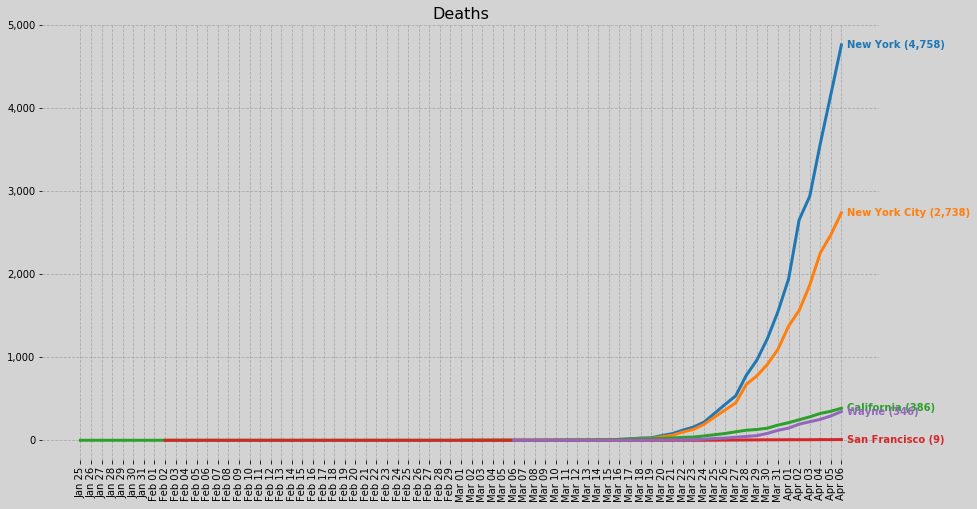

In [71]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0

ticks = []
for n,s in enumerate(regions):
    region = regions[n]
    
    to_plot = dat.loc[dat.region == region]
    
    y = to_plot.deaths
    x = to_plot.date
    
    if len(x) > len(ticks):
        ticks = x
    
    tmp = next((i for i, x in enumerate(y) if x), None)
    if tmp > minx:
        minx = tmp
    
    ax.plot(x, y, color = colors(n), linewidth = 3)
    ax.text(list(x)[-1]+datetime.timedelta(0.5), list(y)[-1], '{} ({:,.0f})'.format(region, list(y)[-1]), color = colors(n), va = 'center', ha = 'left', fontweight = 'bold')

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')

ax.set_xticks(ticks)
ax.set_title('Deaths', fontsize = 16)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')
    
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.xaxis.set_major_formatter(xfmt)

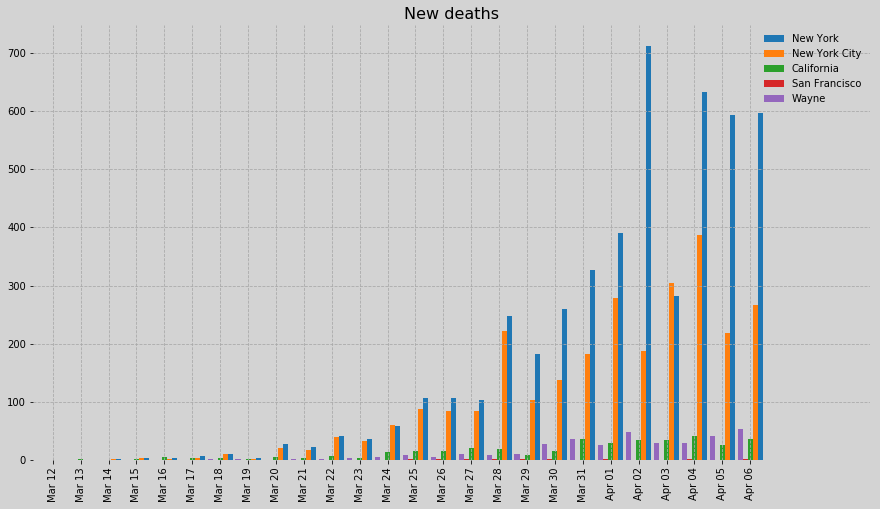

In [72]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111)

minx = 0
width = 0.9/len(regions)

for n,dt in enumerate(sorted(list(set(dat.date)))):
    for r,s in enumerate(regions):
        if dt < min(dat.loc[dat.region == region, 'date']):
            y = 0
        elif dt == min(dat.loc[dat.region == region, 'date']):
            idx = [(x == dt) and (y == s) for x,y in zip(dat.date, dat.region)]
            y = dat.loc[idx, 'deaths']
        else:
            prev_dt = max(dat.loc[dat.date < dt, 'date'])
            idx0 = [(x == prev_dt) and (y == s) for x,y in zip(dat.date, dat.region)]
            idx1 = [(x == dt) and (y == s) for x,y in zip(dat.date, dat.region)]
            if (sum(idx0) == 0) and (sum(idx1) == 0):
                y = 0
            elif (sum(idx0) == 0):
                y = dat.loc[idx1, 'deaths']
            else:
                y = dat.loc[idx1, 'deaths'].item() - dat.loc[idx0, 'deaths'].item()
        
        
        xpos = n + (len(regions)/2 * width) - (r*width) - (width/2)
        if n == 0:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = s)
        else:
            ax.bar(x = xpos, height = y, width = width, color = colors(r), label = None)

for var in ['top', 'bottom', 'left', 'right']:
    ax.spines[var].set_visible(False)
    
ax.grid(linestyle = '--', color = 'darkgrey')
ax.legend(frameon = False)
ax.set_title('New deaths', fontsize = 16)

x = sorted(list(set(dat.date)))
ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels([c.strftime('%b %d') for c in x]);

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    tick.set_ha('center')
    tick.set_va('top')

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

xfmt = mdates.DateFormatter('%b %d')
ax.get_figure().set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.set_xlim(ax.get_xlim()[1]-30, ax.get_xlim()[1]);